In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data=pd.read_csv('solarpowergeneration.csv')
df=raw_data.copy()
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [4]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [5]:
df.duplicated().sum()

0

## Histograms and boxplots

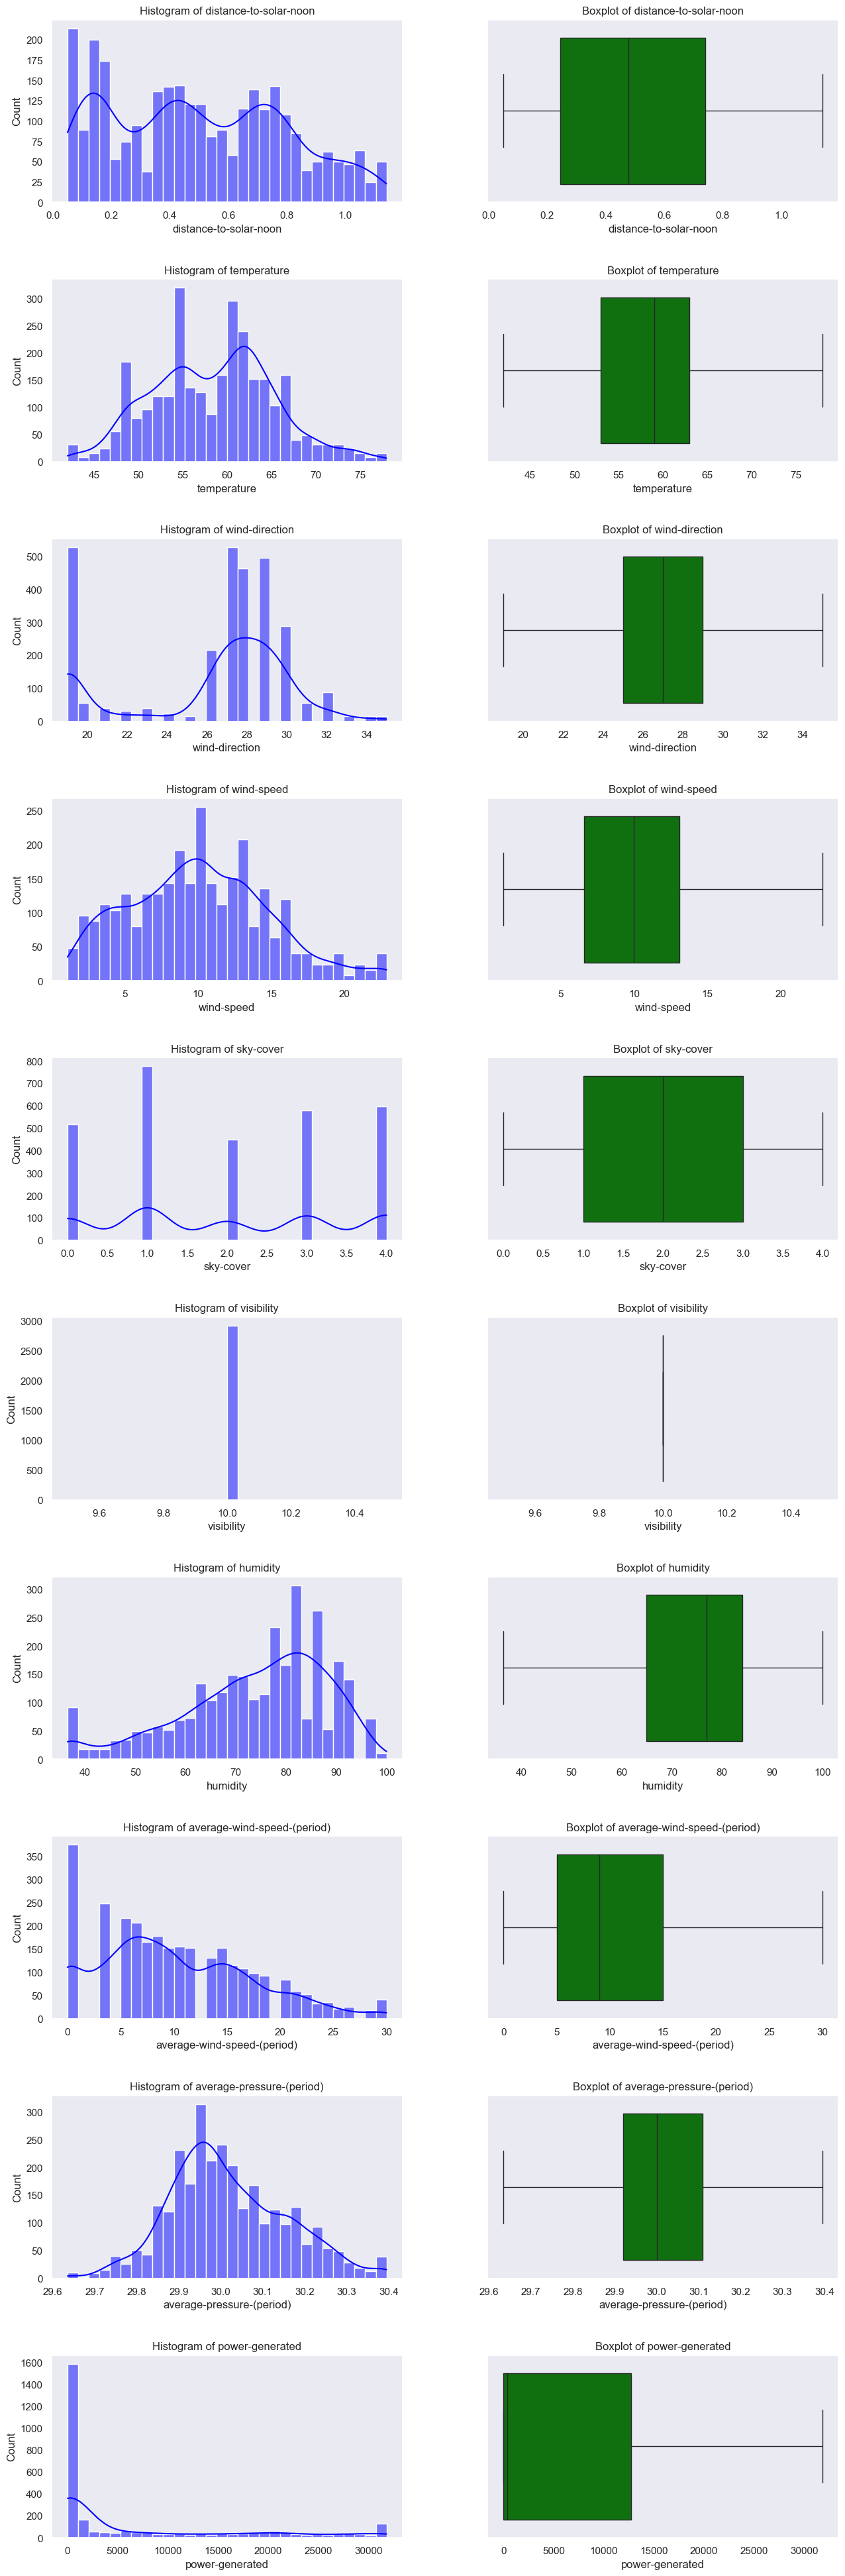

In [19]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.set_theme(style="dark")
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(14, len(numerical_cols) * 4))
fig.tight_layout(pad=5)
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i, 0],bins=30, color="blue")
    axes[i, 0].set_title(f"Histogram of {col}")
    axes[i, 0].set_xlabel(col)
    sns.boxplot(x=df[col], ax=axes[i, 1], color="green")
    axes[i, 1].set_title(f"Boxplot of {col}")
    axes[i, 1].set_xlabel(col)
plt.show()

## Scatter plots

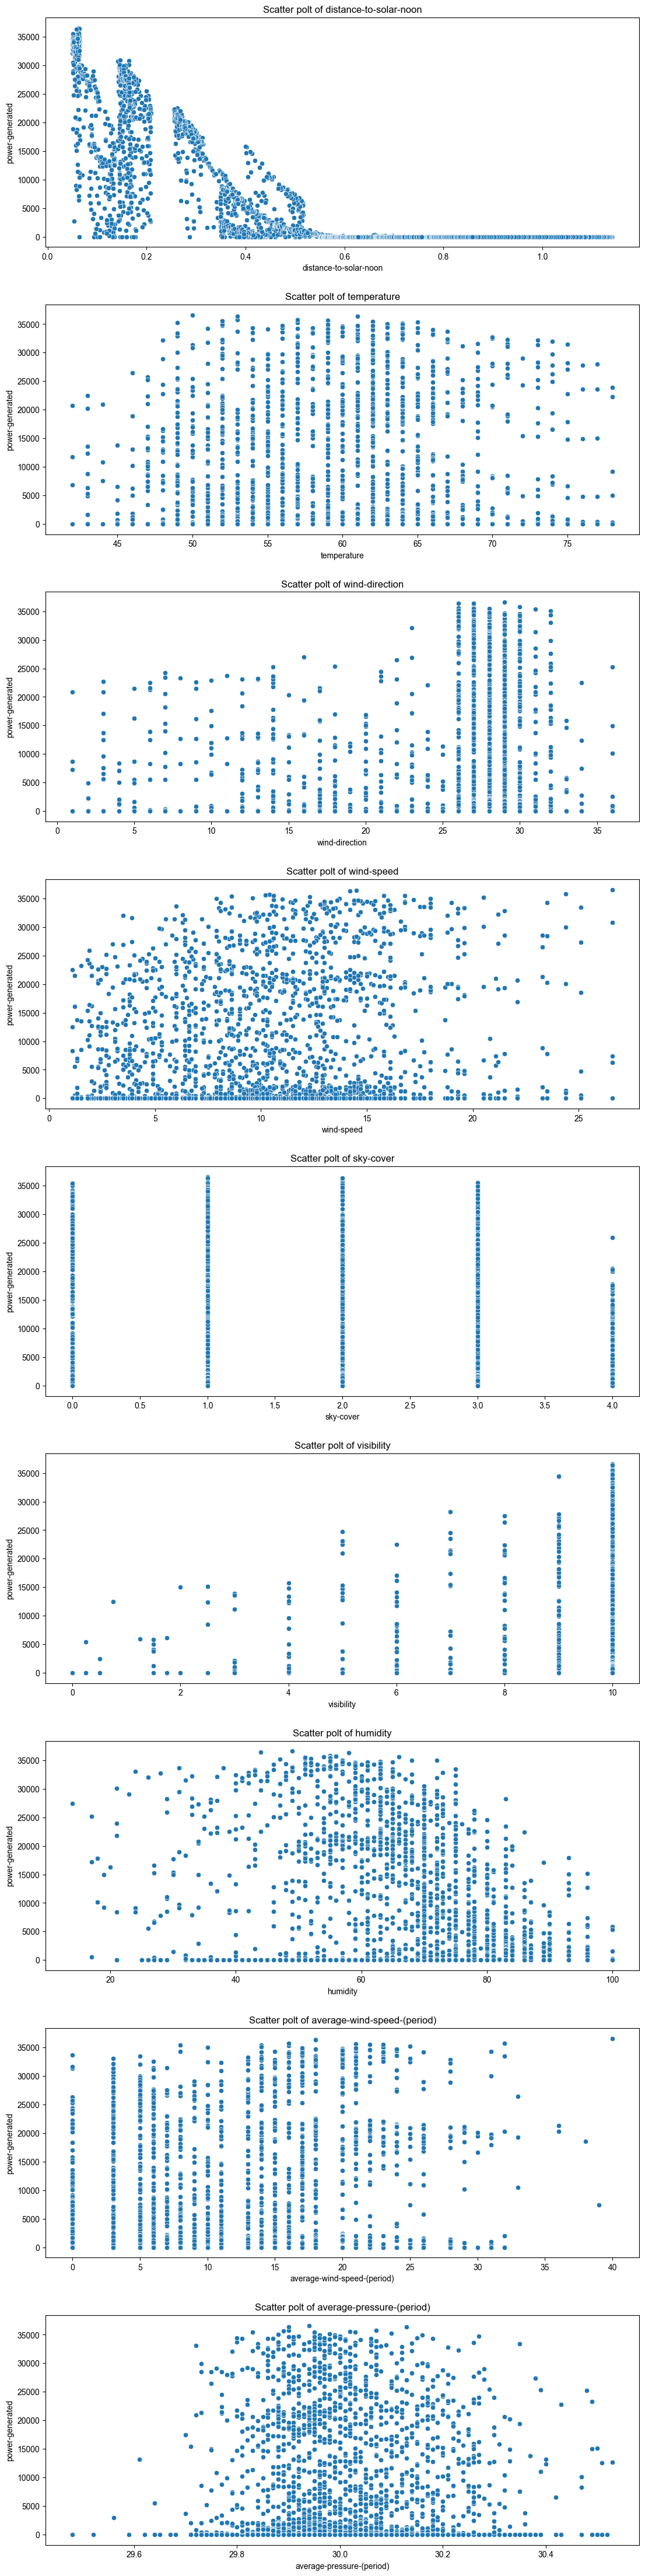

In [7]:
target_col=df['power-generated']
num_cols=numerical_cols.drop('power-generated')
fig,axes=plt.subplots(len(num_cols),1,figsize=(12,len(num_cols)*5))
fig.tight_layout(pad=5)
sns.set_theme(style="dark")
for i,col in enumerate(num_cols):
    sns.scatterplot(x=df[col],y=target_col,data=df,ax=axes[i])
    axes[i].set_title(f"Scatter polt of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('power-generated')  
plt.show()

## Correlation Analysis

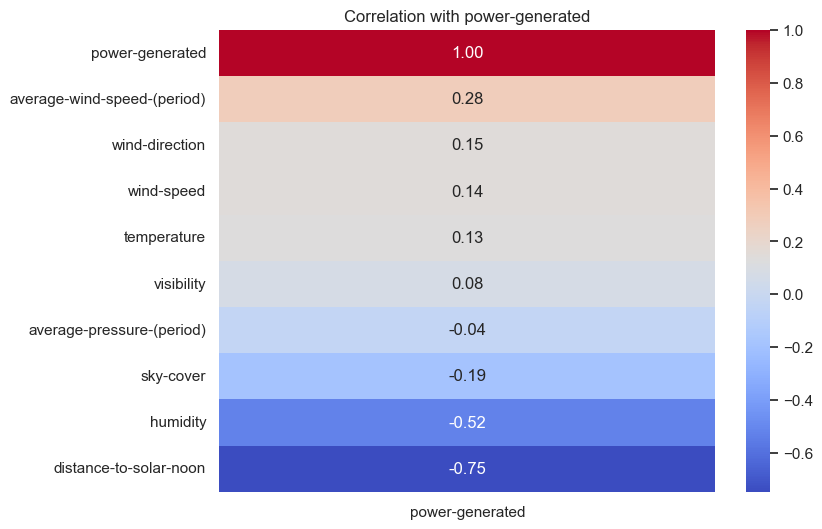

In [8]:
correlation_matrix = df.corr()
target_variable = "power-generated"
target_correlation = correlation_matrix[[target_variable]].sort_values(by=target_variable, ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(target_correlation, annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation with power-generated")
plt.show()

## Imputing Null values

In [9]:
df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].mean(),inplace=True)
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

## Handling Outliers

In [10]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1                   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

for column in numerical_cols:
    handle_outliers_iqr(df, column)

## Model Building

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(df)


x = df.drop(columns=['power-generated'])
y = np.log1p(df['power-generated'])
x = x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((2044, 9), (876, 9), (2044,), (876,))

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


model_performance = {}

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
model_performance['Linear Regression'] = {
    'MAE':mean_absolute_error(y_test,y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2': r2_score(y_test, y_pred_lr)
}

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train) 
y_pred_dt = dt_model.predict(x_test)
model_performance['Decision Tree'] = {
    'MAE':mean_absolute_error(y_test,y_pred_dt),
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'R2': r2_score(y_test, y_pred_dt)
}

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100,max_depth=10)
rf_model.fit(x_train, y_train) 
y_pred_rf = rf_model.predict(x_test)
model_performance['Random Forest'] = {
    'MAE':mean_absolute_error(y_test,y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_test)
model_performance['Support Vector Regressor'] = {
    'MAE':mean_absolute_error(y_test,y_pred_svr),
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'R2': r2_score(y_test, y_pred_svr)
}

# XG boost
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(x_train, y_train)
y_pred_xg=xgb_model.predict(x_test)
model_performance['XG Boost'] = {
    'MAE':mean_absolute_error(y_test,y_pred_xg),
    'MSE': mean_squared_error(y_test, y_pred_xg),
    'R2': r2_score(y_test, y_pred_xg)
}

In [13]:
importances = xgb_model.feature_importances_
feature_names=df.columns
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.2f}")


distance-to-solar-noon: 0.83
temperature: 0.01
wind-direction: 0.02
wind-speed: 0.01
sky-cover: 0.03
visibility: 0.00
humidity: 0.04
average-wind-speed-(period): 0.03
average-pressure-(period): 0.02


In [14]:
results=pd.DataFrame(model_performance)
# results.to_excel("metrics.xlsx")
results

,Linear Regression,Decision Tree,Random Forest,Support Vector Regressor,XG Boost
MAE,1.815114,0.773687,0.656701,3.226324,0.701913
MSE,5.434711,4.378775,2.333136,16.967894,2.265324
R2,0.729813,0.782309,0.884008,0.156440,0.887379


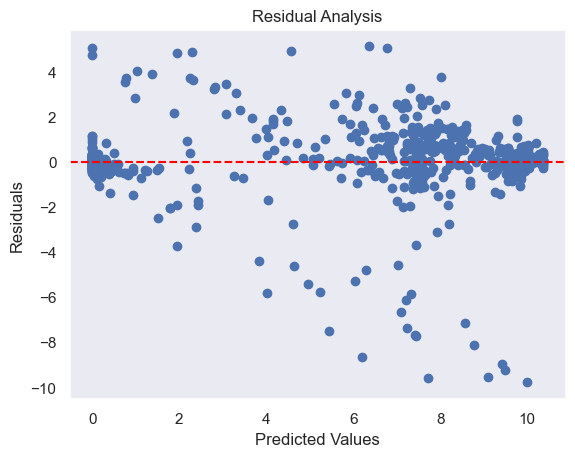

In [15]:
# Residual plot for Xg boost
residuals = y_test - y_pred_xg

plt.scatter(y_pred_rf, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()


Text(0, 0.5, 'Pred')

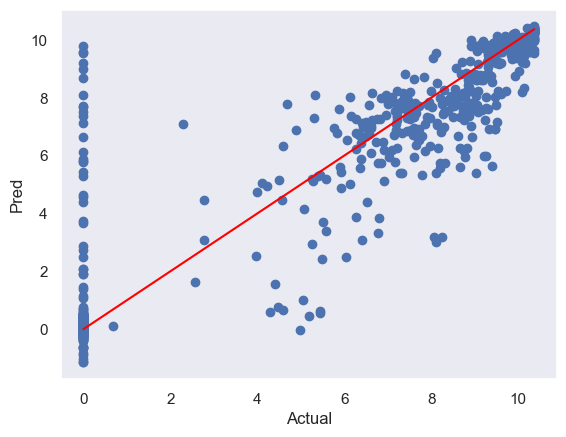

In [16]:
# Predictions of random forest  
plt.scatter(y_test, y_pred_xg)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual')
plt.ylabel('Pred')

## Saving model

In [17]:
import pickle

# Saving xgb_model 
model_file_name = "solar_model.pkl"

try:
    with open(model_file_name, 'wb') as file:
        pickle.dump(xgb_model, file)
    print(f"Model saved successfully to {model_file_name}")
except Exception as e:
    print(f"Error saving the model: {e}")


Model saved successfully to solar_model.pkl
